In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("cities_by_day.csv",header=0, index_col=0, parse_dates=True, squeeze=True)

data.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,
Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2]:
data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format=True)
data.isnull().sum()

Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [3]:
data = data.drop(['C6H6','C8H10','C7H8','NH3','PM10'],axis=1)

In [4]:
data.columns

Index(['Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI',
       'AQI_Bucket'],
      dtype='object')

In [5]:
data['AQI_Bucket'] = data['AQI_Bucket'].astype('category')
from sklearn.preprocessing import LabelEncoder
label_object = {}
labelencoder = LabelEncoder()
labelencoder.fit(data['AQI_Bucket'])
data['AQI_Bucket'] = labelencoder.fit_transform(data['AQI_Bucket'])
label_object['AQI_Bucket'] = labelencoder
data.dtypes

Date          datetime64[ns]
PM2.5                float64
NO                   float64
NO2                  float64
NOx                  float64
CO                   float64
SO2                  float64
O3                   float64
AQI                  float64
AQI_Bucket             int32
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29531 entries, Ahmedabad to Visakhapatnam
Data columns (total 10 columns):
Date          29531 non-null datetime64[ns]
PM2.5         24933 non-null float64
NO            25949 non-null float64
NO2           25946 non-null float64
NOx           25346 non-null float64
CO            27472 non-null float64
SO2           25677 non-null float64
O3            25509 non-null float64
AQI           24850 non-null float64
AQI_Bucket    29531 non-null int32
dtypes: datetime64[ns](1), float64(8), int32(1)
memory usage: 2.4+ MB


In [7]:
data["NO"]=data["NO"].fillna(data.NO2.mean())
data["NO2"]=data["NO2"].fillna(data.NO2.mean())
data["NOx"]=data["NOx"].fillna(data.NOx.mean())
data["CO"]=data["CO"].fillna(data.CO.mean())
data["SO2"]=data["SO2"].fillna(data.SO2.mean())
data["O3"]=data["O3"].fillna(data.O3.mean())
data["AQI"]=data["AQI"].fillna(data.AQI.mean())
data["PM2.5"]=data["PM2.5"].fillna(data['PM2.5'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29531 entries, Ahmedabad to Visakhapatnam
Data columns (total 10 columns):
Date          29531 non-null datetime64[ns]
PM2.5         29531 non-null float64
NO            29531 non-null float64
NO2           29531 non-null float64
NOx           29531 non-null float64
CO            29531 non-null float64
SO2           29531 non-null float64
O3            29531 non-null float64
AQI           29531 non-null float64
AQI_Bucket    29531 non-null int32
dtypes: datetime64[ns](1), float64(8), int32(1)
memory usage: 2.4+ MB


In [8]:
cols=[
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'CO',
 'SO2',
 'O3',
 ]

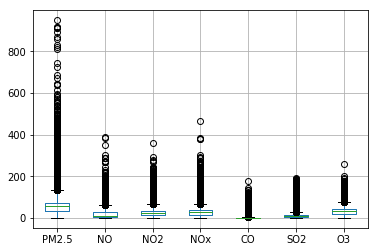

In [9]:
boxplot=data.boxplot(column=cols)

In [10]:
for x in cols:
    highest=data[x].mean() + 3*data[x].std()
    data=data[(data[x] < highest) ]
    

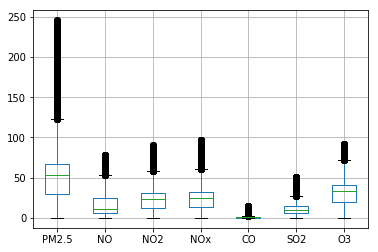

In [11]:
boxplot=data.boxplot(column=cols)

In [12]:
data_new = data.set_index('Date')
data_new.index

DatetimeIndex(['2015-01-02', '2015-01-04', '2015-01-10', '2015-01-15',
               '2015-01-16', '2015-01-17', '2015-01-18', '2015-01-19',
               '2015-01-22', '2015-01-24',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', name='Date', length=25894, freq=None)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CE8E2F1D0>,
      dtype=object)

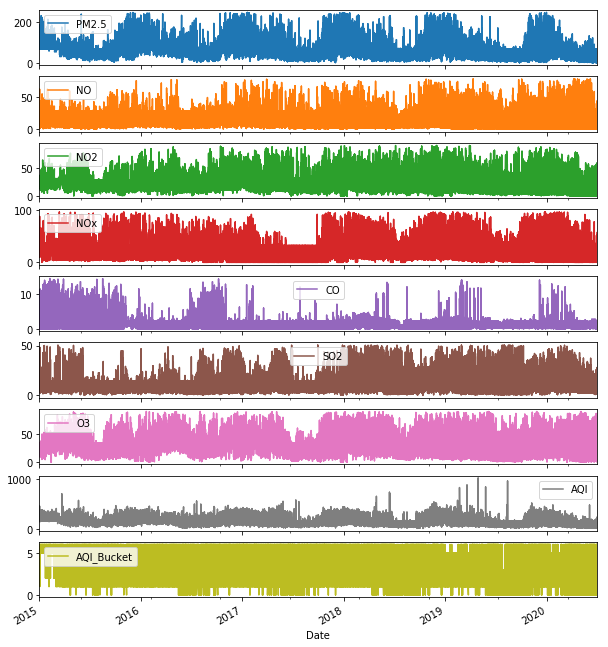

In [13]:
data_new.plot(subplots=True, figsize=(10,12))

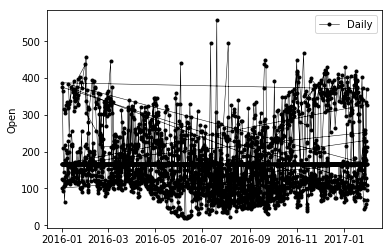

In [16]:
start, end = '2016-01', '2017-01'
fig, ax = plt.subplots()
ax.plot(data_new.loc[start:end, 'AQI'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.set_ylabel("Open")
ax.legend()

In [62]:
y = data_new['AQI'].resample('MS').mean()

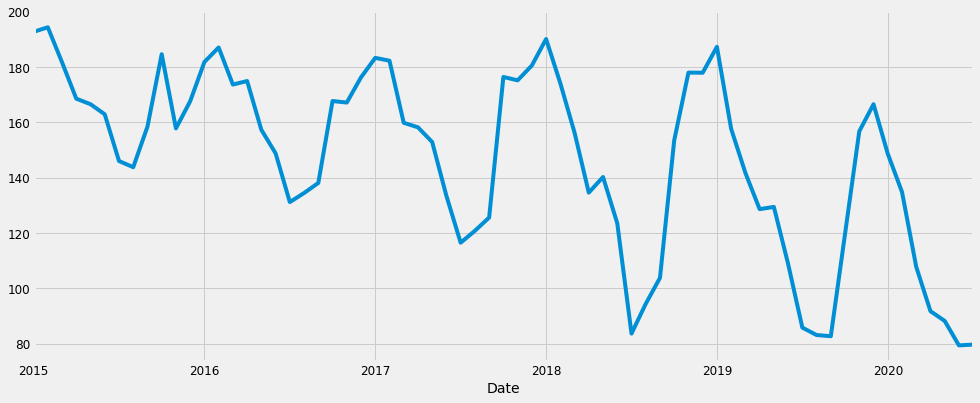

In [63]:
y.plot(figsize=(15, 6))
plt.show()

In [64]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

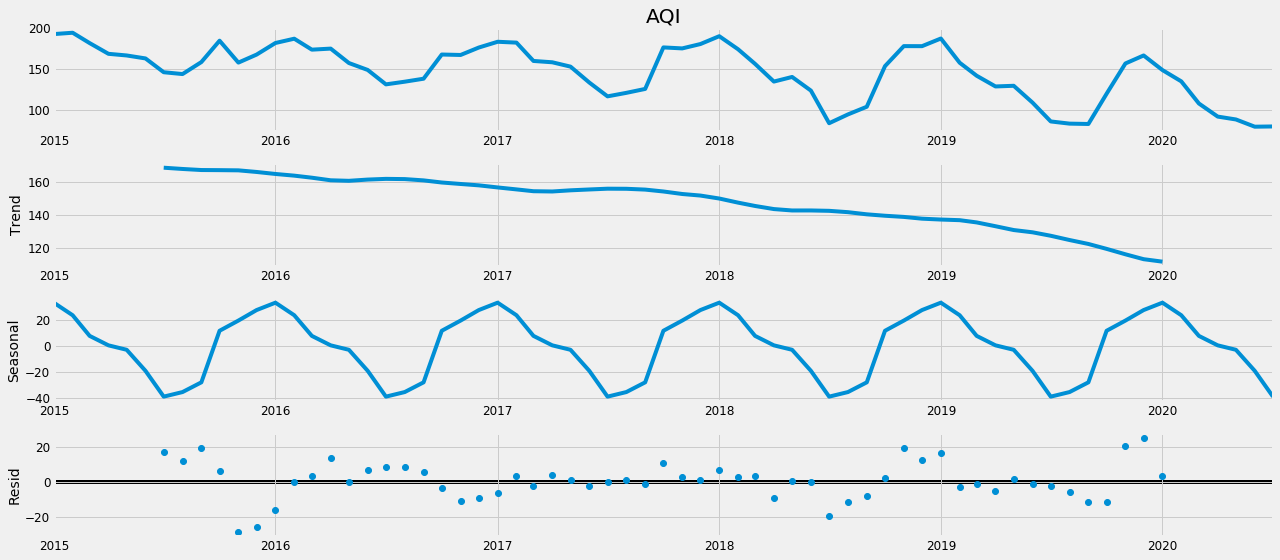

In [65]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [66]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [67]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:850.2083936921138
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:695.2132303049177
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:466.16056314678997
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:360.70006224971695
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:444.78565880037496
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:435.96691000877456
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:360.2069756128371
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:353.11125075258207
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:760.8428955974517
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:574.3928020666058
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:429.98108430556505
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:337.28467463759335
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:425.63299175835704
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:414.3412892840439
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:350.82676585169867
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:338.60875667259654
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:563.3650125634445
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:432.9357532378054


In [70]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4680      0.361      1.295      0.195      -0.241       1.176
ma.L1         -0.9156      0.132     -6.930      0.000      -1.175      -0.657
ma.S.L12       0.1232      0.185      0.666      0.506      -0.240       0.486
sigma2       119.6862     27.388      4.370      0.000      66.007     173.365


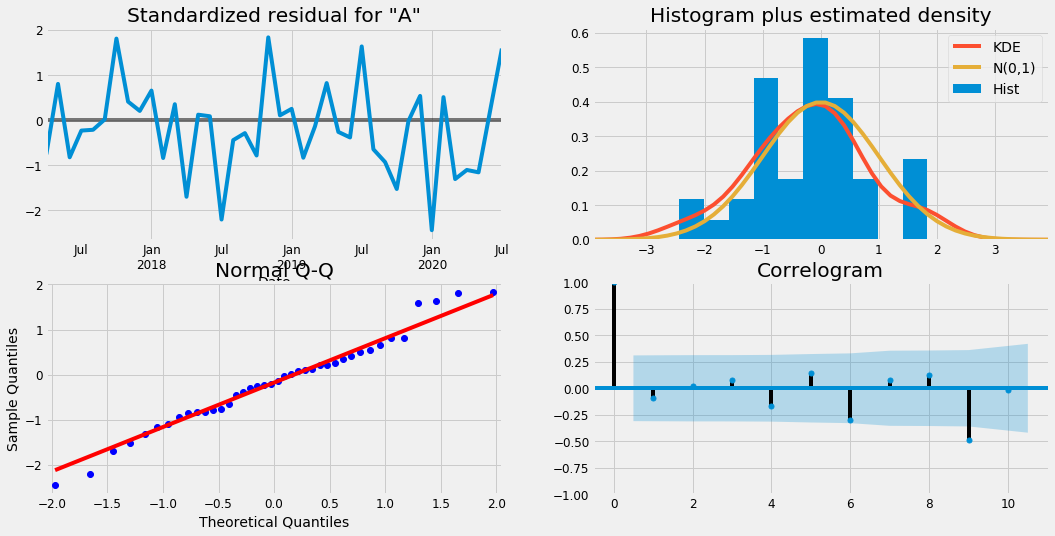

In [71]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

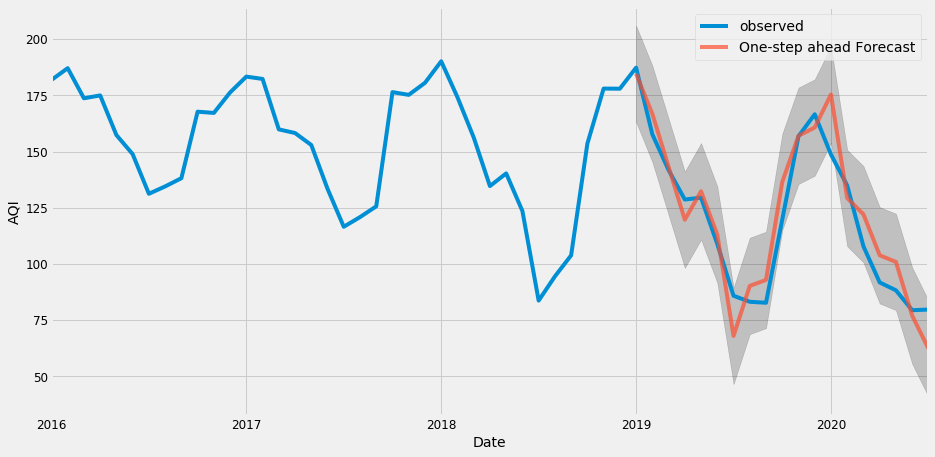

In [72]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

In [73]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_forecasted , y_truth))

The Mean Squared Error of our forecasts is 133.87
R2 score : 0.89
